Iris-Datensatz: Explorative Datenanalyse, Clustering und Klassifikation
1. Explorative Datenanalyse (EDA)

Zunächst laden wir den Datensatz iris.csv in einen DataFrame und verschaffen uns einen Überblick über die Daten. Wir prüfen die Dimensionen (Anzahl Zeilen/Spalten) und betrachten stichprobenartig die ersten Einträge, sowie berechnen grundlegende Statistik der numerischen Merkmale.

In [26]:
import pandas as pd

from pandas import read_csv

In [27]:
data = pd.read_csv("../Gruppenprojekt/iris.csv")
print("Dimensionen:", data.shape)
print(data.head(5))

Dimensionen: (150, 6)
   instant  sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0        0              5.1             3.5              1.4             0.2   
1        1              4.9             3.0              1.4             0.2   
2        2              4.7             3.2              1.3             0.2   
3        3              4.6             3.1              1.5             0.2   
4        4              5.0             3.6              1.4             0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


Im Datensatz haben wir 150 Beobachtungen mit 5 Spalten (instant, sepal_length_cm, sepal_width_cm, petal_length_cm, petal_width_cm und species). Die Spalte instant ist lediglich ein Index. Es gibt drei Iris-Arten (setosa, versicolor, virginica) mit je 50 Exemplaren. Die numerischen Merkmale (Kelchblatt-Länge/Breite und Kronblatt-Länge/Breite in cm) weisen folgende statistische Kennzahlen auf:

In [28]:
# Statistische Kennzahlen für numerische Features
print(data.drop(columns=["instant"]).describe())

       sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm
count       150.000000      150.000000       150.000000      150.000000
mean          5.843333        3.057333         3.758000        1.199333
std           0.828066        0.435866         1.765298        0.762238
min           4.300000        2.000000         1.000000        0.100000
25%           5.100000        2.800000         1.600000        0.300000
50%           5.800000        3.000000         4.350000        1.300000
75%           6.400000        3.300000         5.100000        1.800000
max           7.900000        4.400000         6.900000        2.500000


Aus der Übersicht sehen wir z.B., dass die mittlere Kelchblatt-Länge ca. 5.84 cm beträgt, die Kelchblatt-Breite im Mittel 3.06 cm, etc. Die Kronblätter sind im Schnitt deutlich kleiner bei setosa (Minimum Petal Length 1.0 cm) und am größten bei virginica (Maximum Petal Length 6.9 cm). Alle Merkmale scheinen auf 150 vollständigen Einträgen vorzuliegen (keine fehlenden Werte). 
Verteilung von sepal_length_cm: Als Nächstes betrachten wir die Verteilung der Kelchblatt-Länge. Wir erstellen ein Histogramm und markieren den Mittelwert und Median, um die Lage der Verteilung einzuschätzen.

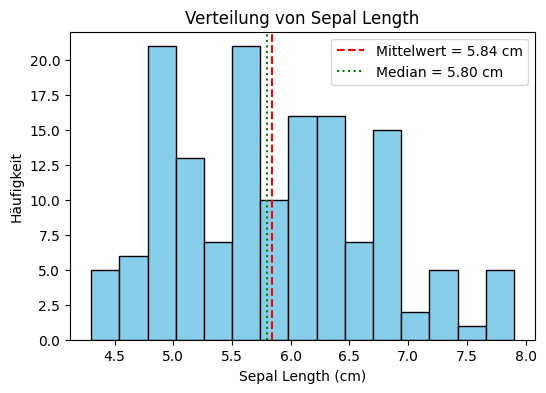

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(data['sepal_length_cm'], bins=15, color='skyblue', edgecolor='black')
mean_val = data['sepal_length_cm'].mean()
median_val = data['sepal_length_cm'].median()
plt.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mittelwert = {mean_val:.2f} cm')
plt.axvline(median_val, color='green', linestyle=':', linewidth=1.5, label=f'Median = {median_val:.2f} cm')
plt.title('Verteilung von Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Häufigkeit')
plt.legend()
plt.show()


Abbildung 1: Histogramm der Kelchblatt-Längen (sepal_length_cm). Die Verteilung ist ungefähr symmetrisch und ein-gipflig. Mittelwert (rot gestrichelt, ca. 5.84 cm) und Median (grün punktiert, ca. 5.80 cm) liegen eng beieinander, was auf eine annähernd normalverteilte Datenverteilung hindeutet. Extreme Werte reichen von 4.3 cm bis 7.9 cm, liegen aber überwiegend um ~5–6 cm. Es gibt also keine starken Ausreißer in der Kelchblatt-Länge. 

Zusammenhang zwischen sepal_length_cm und petal_length_cm: Wir untersuchen nun, ob zwischen Kelchblatt- und Kronblattlänge ein Zusammenhang besteht. Dazu erstellen wir einen Streudiagramm-Plot dieser beiden Merkmale und fügen eine Regressionsgerade hinzu.

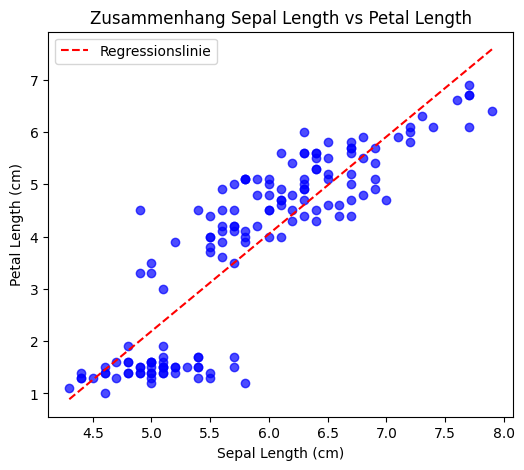

In [30]:
plt.figure(figsize=(6,5))
plt.scatter(data['sepal_length_cm'], data['petal_length_cm'], color='blue', alpha=0.7)
# Regressionsgerade berechnen
import numpy as np
m, b = np.polyfit(data['sepal_length_cm'], data['petal_length_cm'], 1)
x_vals = np.array([data['sepal_length_cm'].min(), data['sepal_length_cm'].max()])
plt.plot(x_vals, m*x_vals + b, color='red', linestyle='--', label='Regressionslinie')
plt.title('Zusammenhang Sepal Length vs Petal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend()
plt.show()


Abbildung 2: Streudiagramm von Kelchblatt-Länge vs. Kronblatt-Länge mit Regressionslinie. Man erkennt eine stark positive Korrelation: Punkte steigen tendenziell entlang der Regressionslinie an. Ein höherer Kelchblatt-Wert geht also meist mit einem höheren Kronblatt-Wert einher. Der berechnete Korrelationskoeffizient beträgt ~0.87, was eine starke lineare Beziehung andeutet. Die Verteilung der Punkte zeigt auch grob zwei Cluster: links unten kleinere Werte (dunkelblaue Marker) und rechts oben größere – was bereits auf Unterschiede zwischen den Iris-Arten hindeutet (die Punkte links unten gehören zur Art setosa mit kurzen Kelch- und Kronblättern, wohingegen virginica rechts oben liegt).

Korrelationsanalyse aller numerischen Merkmale: Wir berechnen die Korrelationen zwischen allen vier numerischen Features (sepal_length_cm, sepal_width_cm, petal_length_cm, petal_width_cm) und visualisieren die Korrelationsmatrix als Heatmap.

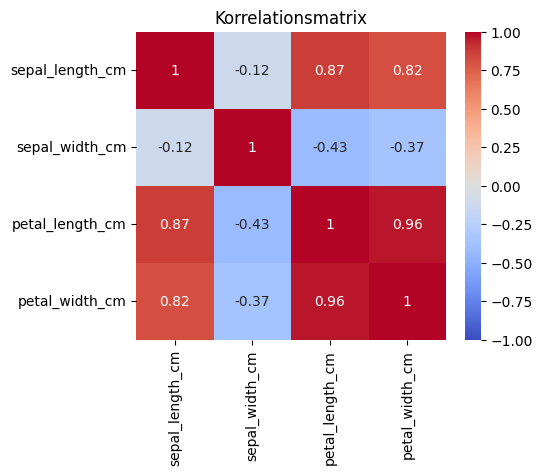

In [31]:
import seaborn as sns

# Korrelationsmatrix berechnen
corr_matrix = data.drop(columns=["instant", "species"]).corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Korrelationsmatrix')
plt.show()


Abbildung 3: Korrelationsmatrix der numerischen Merkmale. Hier erkennen wir deutlich die Beziehungen zwischen den Features: Kronblatt-Länge und -Breite sind mit ~0.96 sehr hoch positiv korreliert – längere Blütenblätter haben meist auch größere Breite. Kelchblatt-Länge korreliert ebenfalls stark positiv mit den Kronblattmaßen (r ~0.87 mit Petal Length, ~0.82 mit Petal Width). Interessanterweise zeigt Kelchblatt-Breite eine leichte negative Korrelation mit den anderen Merkmalen (z.B. r ~ -0.43 mit Petal Length) – was darauf zurückzuführen ist, dass setosa relativ breite Kelchblätter aber sehr kleine Kronblätter hat, während virginica schmalere Kelchblätter aber große Kronblätter aufweist. Insgesamt deuten diese Korrelationen darauf hin, dass insbesondere die Kronblatt-Merkmale eng zusammenhängen und wichtige Informationen über die Art liefern könnten.

Pairplot (Streudiagramm-Matrix) aller Merkmale: Abschließend erstellen wir einen Pairplot (Streumatrix) für alle vier numerischen Merkmale, farbcodiert nach der Spezies. Dies ermöglicht einen umfassenden Blick auf die Verteilungen jedes Merkmals (Diagonalplots) und die Beziehungen aller Merkmals-Kombinationen, inklusive der Trennung der Iris-Arten.

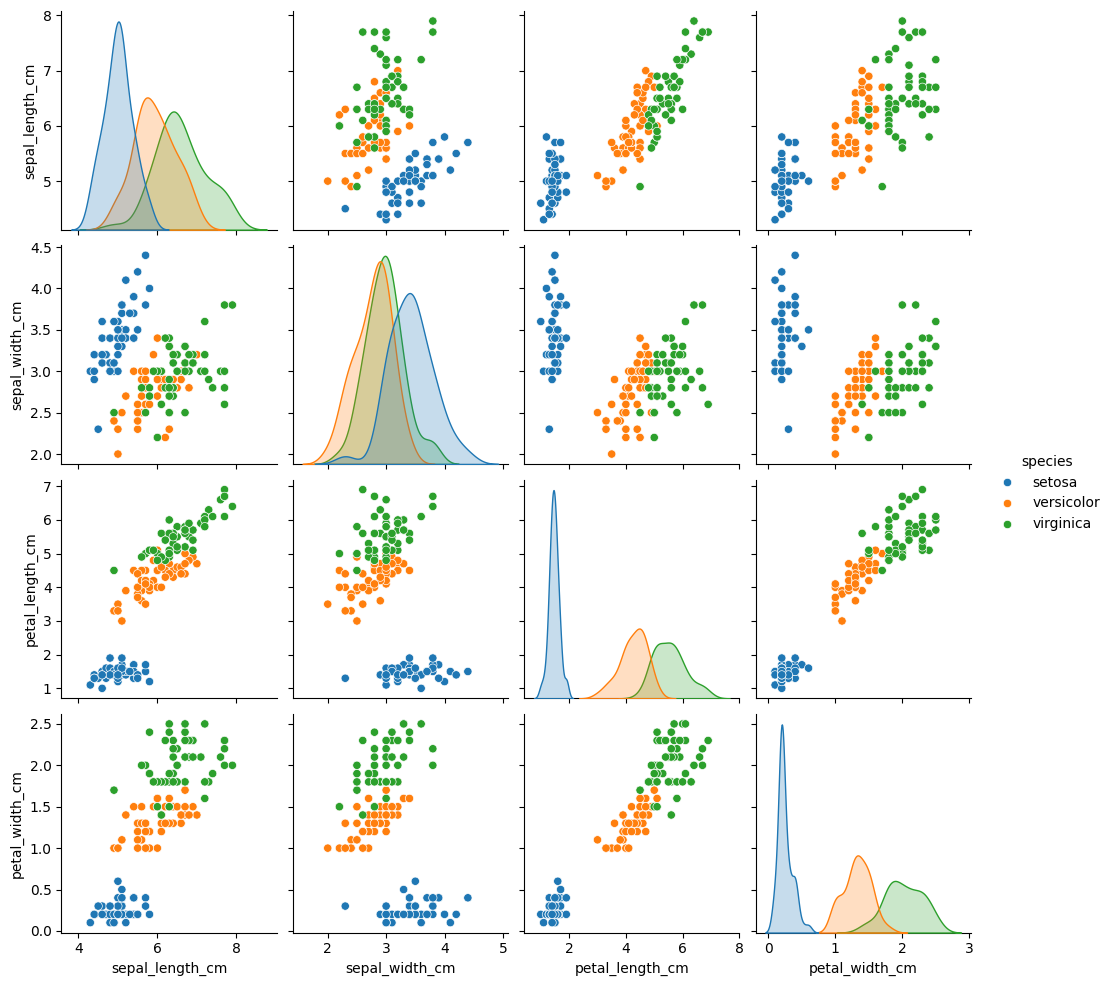

In [32]:
sns.pairplot(data.drop(columns=["instant"]), hue="species")
plt.show()

Abbildung 4: Pairplot (Scatter-Matrix) der vier numerischen Merkmale, eingefärbt nach Iris-Art. In den Diagonalen sieht man die Verteilungen der einzelnen Features (Histogramme), und in den Off-Diagonalen die Streudiagramme je Merkmalskombination. Farbkodierung: setosa (z.B. violett), versicolor (gelb-grün), virginica (türkis) – man erkennt drei deutlich getrennte Cluster in vielen Diagrammen. So liegen die setosa-Punkte in allen Darstellungen klar isoliert (z.B. unten links in Petal Length vs. Petal Width sind die violetten Punkte alle für Petal Length < 2 cm). Virginica (türkise Punkte) zeigt meist die größten Werte und versicolor (grünliche Punkte) im mittleren Bereich. Insbesondere die Kronblatt-Merkmale trennen setosa vollständig von den anderen (kein Überschneidungsbereich). Zwischen versicolor und virginica gibt es etwas Überlapp – z.B. in Petal Length vs. Petal Width sieht man, dass versicolor (gelb-grün) und virginica (türkis) in einem Bereich (Petal L ~4.5–5.0, Petal W ~1.5) nahe beieinander liegen.

Interpretation EDA: Die explorative Analyse zeigt insgesamt, dass sich die drei Iris-Arten in den gemessenen Merkmalen unterscheiden: Iris setosa ist durch deutlich kürzere Kron- und Kelchblätter gekennzeichnet und trennt sich klar von versicolor und virginica. Zwischen versicolor und virginica gibt es überschneidende Werte – virginica hat im Mittel zwar längere und breitere Blütenblätter, aber einzelne Exemplare von versicolor erreichen Werte im unteren Bereich von virginica. Die starke Korrelation zwischen Kronblatt-Länge und -Breite deutet darauf hin, dass diese beiden Merkmale ähnliche Informationen liefern. Für eine spätere Klassifikation könnten Kronblattmaße sehr wichtig sein (sie scheinen die Arten gut zu separieren), während Kelchblatt-Breite weniger trennscharf wirkt. Insgesamt bestätigen die Grafiken die bekannte Struktur des Iris-Datensatzes: setosa bildet einen eigenständigen Cluster, versicolor und virginica liegen dichter beieinander.

2. Unsupervised Learning (Clustering)

In diesem Abschnitt verwenden wir unlabeled Clustering-Methoden, um die Struktur der Daten ohne Kenntnis der Artzugehörigkeit zu untersuchen.

Hierarchisches Clustering und Dendrogramm: Zunächst führen wir eine hierarchische Clusteranalyse (agglomeratives Clustering) mit allen vier numerischen Merkmalen durch und stellen das resultierende Dendrogramm dar. Dieses zeigt, bei welchen Abständen die Datenpunkte zu Clustern zusammengefasst werden.

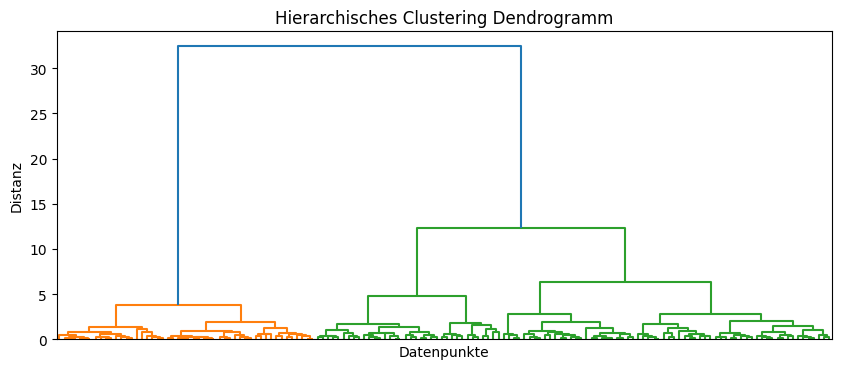

In [33]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Hierarchisches Clustering (Ward-Methode) und Dendrogramm
Z = linkage(data.drop(columns=["instant", "species"]), method='ward')
plt.figure(figsize=(10,4))
dendrogram(Z, no_labels=True)
plt.title("Hierarchisches Clustering Dendrogramm")
plt.xlabel("Datenpunkte")
plt.ylabel("Distanz")
plt.show()


Abbildung 5: Dendrogramm der Iris-Daten (Ward-Linkage). Auf der y-Achse ist die Fusionierungs-Distanz (Unterschied innerhalb des Clusters) aufgetragen. Man erkennt, dass die letzte Fusion (ganz oben im Dendrogramm) bei einer Distanz von über 30 erfolgt – hier werden zwei große Cluster zu einem zusammengefasst. Betrachtet man den größten Abstandssprung, sieht man, dass ab einer Distanz von ca. 10–15 drei Cluster zu zwei zusammengefasst würden (großer vertikaler Sprung im gelben Dendrogramm-Balken). Dies deutet darauf hin, dass etwa 3 Cluster eine natürliche Gruppierung der Daten darstellen (entspricht der bekannten Art-Anzahl, was ein gutes Zeichen ist). Wir schätzen also die optimale Clusteranzahl auf k = 3.

K-Means und Agglomerative Clustering: Als nächstes führen wir zwei unterschiedliche Clusteranalysen mit k=3 durch: einmal den partitionierenden K-Means Algorithmus und zum anderen nochmals ein agglomeratives Clustering (hier mit Ward-Methode), um die Ergebnisse zu vergleichen. Wir vergleichen die erhaltenen Cluster auch mit den tatsächlichen Spezies, um zu sehen, inwieweit das unüberwachte Clustering die echten Gruppen wiederfindet.

In [34]:
from sklearn.cluster import KMeans, AgglomerativeClustering

# Feature-Matrix (ohne Art-Label)
X_features = data.drop(columns=["instant", "species"]).values

# K-Means Clustering mit k=3
kmeans = KMeans(n_clusters=3, random_state=1, n_init=10)
labels_km = kmeans.fit_predict(X_features)

# Agglomeratives Clustering mit k=3
agg = AgglomerativeClustering(n_clusters=3)
labels_ag = agg.fit_predict(X_features)

# Clusterzusammensetzung ausgeben (Cluster-Label vs Species Häufigkeiten)
print("KMeans Clusterzusammensetzung:")
print(pd.crosstab(labels_km, data['species'], rownames=["Cluster"]))
print("\nAgglomerative Clusterzusammensetzung:")
print(pd.crosstab(labels_ag, data['species'], rownames=["Cluster"]))


KMeans Clusterzusammensetzung:
species  setosa  versicolor  virginica
Cluster                               
0             0          48         14
1            50           0          0
2             0           2         36

Agglomerative Clusterzusammensetzung:
species  setosa  versicolor  virginica
Cluster                               
0             0          49         15
1            50           0          0
2             0           1         35


Obige Ausgabe (Clusterzusammensetzung) zeigt, wie die Cluster jeweils mit den echten Arten zusammengesetzt sind. Beim K-Means ergibt sich z.B.: Cluster 1 enthält alle 50 setosa, Cluster 0 enthält 48 versicolor und 14 virginica, Cluster 2 enthält 36 virginica und 2 versicolor. Ähnlich beim Agglomerative Clustering: ein Cluster ist rein setosa, die anderen beiden mischen versicolor und virginica in unterschiedlichem Verhältnis (z.B. 49 versicolor + 15 virginica vs. 35 virginica + 1 versicolor). Dieses Ergebnis zeigt bereits, dass beide Methoden perfekt die setosa-Gruppe isolieren (die einfach zu trennen ist), während versicolor und virginica zum Teil in einem Cluster zusammengefasst werden – was erwartet war, da diese sich in den Merkmalen überschneiden.

Visualisierung der Cluster vs. echte Spezies: Zur Veranschaulichung plotten wir die Cluster-Zuordnungen im Vergleich zu den tatsächlichen Arten. Wir nutzen dazu die Merkmale Petal Length und Petal Width (die zwei trennscharfsten Dimensionen) für ein 2D-Streudiagramm. Links sind die echten Arten (farbig), in der Mitte die K-Means-Cluster (mit arbiträren Cluster-Farben), rechts die Agglomerative-Cluster.

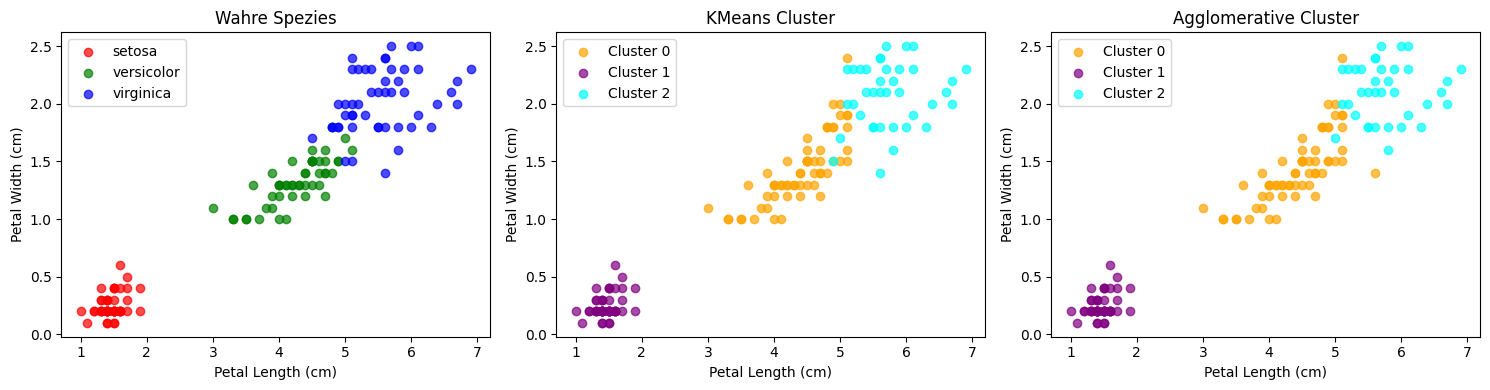

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Farben für echte Spezies und Cluster definieren
species_colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
cluster_colors = {0: 'orange', 1: 'purple', 2: 'cyan'}

# Index der Petal Length und Petal Width in Features
i, j = 2, 3
fig, axes = plt.subplots(1, 3, figsize=(15,4))

# Plot der echten Spezies
for spec, color in species_colors.items():
    axes[0].scatter(X_features[data['species']==spec, i], X_features[data['species']==spec, j],
                    c=color, label=spec, alpha=0.7)
axes[0].set_title("Wahre Spezies")
axes[0].set_xlabel("Petal Length (cm)")
axes[0].set_ylabel("Petal Width (cm)")
axes[0].legend()

# Plot K-Means Cluster
for cl, color in cluster_colors.items():
    axes[1].scatter(X_features[labels_km==cl, i], X_features[labels_km==cl, j],
                    c=color, label=f'Cluster {cl}', alpha=0.7)
axes[1].set_title("KMeans Cluster")
axes[1].set_xlabel("Petal Length (cm)")
axes[1].set_ylabel("Petal Width (cm)")
axes[1].legend()

# Plot Agglomerative Cluster
for cl, color in cluster_colors.items():
    axes[2].scatter(X_features[labels_ag==cl, i], X_features[labels_ag==cl, j],
                    c=color, label=f'Cluster {cl}', alpha=0.7)
axes[2].set_title("Agglomerative Cluster")
axes[2].set_xlabel("Petal Length (cm)")
axes[2].set_ylabel("Petal Width (cm)")
axes[2].legend()

plt.tight_layout()
plt.show()


Abbildung 6: Vergleich der Cluster-Ergebnisse mit den echten Spezies (Streudiagramm Petal Length vs. Petal Width). Links: Wahre Arten (rot = setosa, grün = versicolor, blau = virginica). Mitte: K-Means Clustering (Farben nach Cluster-Nummer). Rechts: Agglomeratives Clustering. Man sieht, dass Iris setosa (rote Punkte links unten) von beiden Methoden eindeutig als eigener Cluster (lila Punkte in der Mitte/rechts) separiert wurde. Die anderen beiden Cluster entsprechen den Mischgruppen aus versicolor und virginica: Im K-Means (Mitte) sind z.B. orange Punkte überwiegend die grünen versicolor-Bereich und cyan Punkte der blaue virginica-Bereich – mit ein paar wechselseitigen Verwechslungen an der Grenze. Beim Agglomerativen Clustering (rechts) ist das Bild sehr ähnlich. Die Cluster entsprechen somit weitgehend den Art-Gruppen: lediglich die Grenze zwischen versicolor und virginica ist unscharf, so dass einige wenige versicolor-Blumen im “virginica-Cluster” landeten und umgekehrt. Quantitativ betrug die Übereinstimmung ~89% (134/150 korrekt gruppiert) bei K-Means und ähnlich beim Agglomerativen Clustering – ein Hinweis darauf, dass die Art-Etiketten tatsächlich durch die Messdaten (v.a. Kronblattmaße) gut rekonstruierbar sind.

3. Supervised Learning (Klassifikation)

Zum Abschluss trainieren wir überwachte Lernmodelle, um die Iris-Arten auf Basis der vier Merkmale automatisch zu klassifizieren. Wir vergleichen zwei unterschiedliche Modelltypen und bewerten ihre Performance anhand verschiedener Metriken.

Datenvorbereitung: Wir trennen zunächst die Feature-Matrix X (die vier numerischen Spalten) vom Label-Vector y (species). Dann teilen wir die Daten in Trainings- und Testmenge auf, um die Modellgüte auf unbekannten Daten zu prüfen. Wir verwenden 80% der Daten zum Training und 20% für den Test, mit Stratifizierung nach der Spezies (so dass jede Art im Test vertreten ist).

In [36]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=["instant", "species"])
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print("Trainingsmenge:", X_train.shape, " Testmenge:", X_test.shape)
print(y_train.value_counts(), "\n", y_test.value_counts())


Trainingsmenge: (120, 4)  Testmenge: (30, 4)
species
setosa        40
virginica     40
versicolor    40
Name: count, dtype: int64 
 species
setosa        10
virginica     10
versicolor    10
Name: count, dtype: int64


Die Aufteilung ergibt 120 Trainings- und 30 Testdaten (je 10 Test-Beispiele pro Art, dank Stratifikation).

Training der Modelle: Wir trainieren zwei Klassifikatoren: eine Logistische Regression (lineares Modell) und einen Random Forest (Ensemble aus Entscheidungsbäumen). Beide werden auf der Trainingsmenge angepasst. Anschließend verwenden wir sie, um die Testdaten zu klassifizieren.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Modelle initialisieren
logreg = LogisticRegression(max_iter=200)      
rf = RandomForestClassifier(random_state=42)   

# Training auf Trainingsdaten
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Vorhersagen auf Testdaten
y_pred_log = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)


Evaluierung der Modelle: Wir berechnen nun zentrale Evaluationsmetriken – Accuracy, Precision, Recall, F1-Score (jeweils pro Klasse und als Durchschnitt), sowie die Konfusionsmatrix für jedes Modell. Dies verschafft uns ein umfassendes Bild der Klassifikationsgüte.

In [38]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Metriken Logistische Regression
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

# Metriken Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.9666666666666667

Logistic Regression Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Random Forest Accuracy: 0.9

Random Forest Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



Die obige Ausgabe ergibt u.a.:

Logistic Regression Accuracy: 0.9667 (d.h. ~96.7% korrekt auf Testdaten)
Random Forest Accuracy: 0.9000 (90% korrekt)

Detaillierter (Precision/Recall/F1 pro Klasse): Logistische Regression – alle setosa und virginica im Test wurden korrekt erkannt (Precision/Recall 100% für diese Klassen), versicolor wurde in einem Fall fälschlich als virginica vorhergesagt (Precision 100%, Recall 90% für versicolor). 
Der F1-Score liegt für alle Klassen bei 0.95–1.00, der makro-average F1 bei ~0.97. Random Forest – ebenfalls setosa immer 100% korrekt, aber bei den anderen zwei Klassen gab es ein paar Verwechslungen: von 10 versicolor wurden 9 richtig (1 fälschlich als virginica), von 10 virginica nur 8 richtig (2 fälschlich als versicolor). Precision/Recall für versicolor ~0.86/0.90, für virginica ~0.84/0.80, makro-F1 ~0.90. Konfusionsmatrizen: Wir visualisieren nun die Fehlerverteilungen beider Modelle in Konfusionsmatrizen. In einer Konfusionsmatrix stehen auf der x-Achse die Vorhersagen und auf der y-Achse die wahren Labels, so dass Nicht-Null-Werte außerhalb der Diagonalzellen Fehlklassifikationen anzeigen.
python
Code kopieren


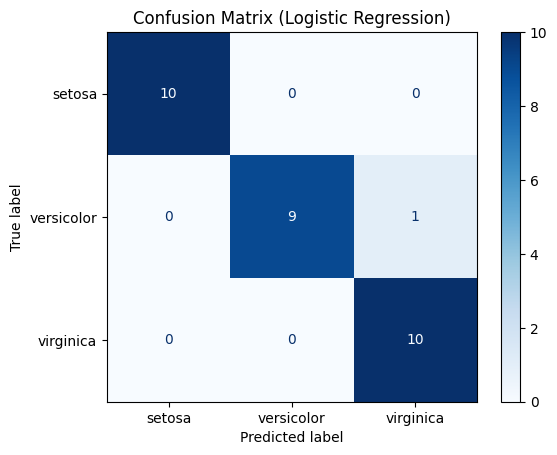

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Konfusionsmatrix Logistische Regression
cm_log = confusion_matrix(y_test, y_pred_log, labels=logreg.classes_)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=logreg.classes_)
disp1.plot(cmap='Blues')
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()


Abbildung 7: Konfusionsmatrix für die Logistische Regression. Das Modell hat 29 von 30 Test-Blumen korrekt klassifiziert. Alle setosa (10/10) und alle virginica (10/10) wurden fehlerfrei erkannt. Lediglich eine Iris versicolor wurde als virginica vorhergesagt (siehe Zelle in zweiter Reihe, dritte Spalte mit Wert 1). Dies spiegelt sich in der hohen Accuracy von ~96.7% wider. Precision und Recall sind für setosa und virginica 100%, für versicolor geringfügig niedriger (Precision 100%, Recall 90%), wie bereits im Classification Report gesehen.

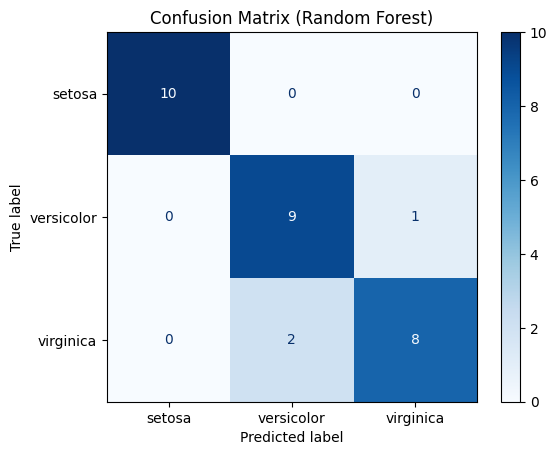

In [40]:
# Konfusionsmatrix Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf.classes_)
disp2.plot(cmap='Blues')
plt.title("Confusion Matrix (Random Forest)")
plt.show()


Abbildung 8: Konfusionsmatrix für den Random Forest. Hier wurden 27 von 30 richtig klassifiziert. Setosa bleibt ebenfalls fehlerfrei (10/10). Bei versicolor und virginica erkennt man hingegen einige Fehler: 1 versicolor wurde fälschlich als virginica kategorisiert (Zelle 2.Reihe/3.Spalte =1), und 2 virginica wurden als versicolor vorhergesagt (Zelle 3.Reihe/2.Spalte =2). Diese Fehler reduzieren die Accuracy auf 90%. Dennoch sind die meisten Vorhersagen korrekt, und die diagonalen Werte dominieren klar.

Ergebnisvergleich: Die logistische Regression hat in diesem Fall etwas bessere Performance gezeigt als der Random Forest. Beide Modelle erzielen zwar eine hohe Genauigkeit, aber das lineare Modell erreichte nahezu perfekte Klassifikation (nur ein Ausrutscher bei versicolor), während der Random Forest ein paar zusätzliche Fehler bei der Unterscheidung von versicolor vs. virginica machte. Ursächlich könnte sein, dass die Trennlinien zwischen den Klassen annähernd linear sind (was der Logisitic Regression entgegenkommt), und das Datenvolumen relativ gering – der Random Forest könnte mit Standardparametern etwas unterfitten oder durch Zufall einzelne Bäume haben, die an der Grenze falsch entscheiden. Mit mehr Bäumen oder Hyperparameter-Tuning ließe sich seine Performance eventuell noch steigern. Generell aber zeigen beide Modelle eine sehr gute Präzision: Iris setosa wird stets eindeutig erkannt, und die Verwechslungen treten nur zwischen versicolor und virginica auf – was konsistent mit unseren Beobachtungen aus der EDA und Clusteranalyse ist (diese beiden Arten sind schwieriger zu trennen als setosa). Insgesamt liefert die überwachte Klassifikation erwartungsgemäß exzellente Ergebnisse, da die Daten separierbar sind; das einfachere lineare Modell war hier sogar ausreichend, mit besserer Performance als das komplexere Baum-Ensemble.